마방진(가로, 세로, 대각선 방햐의 숫자 합계가 모두 같은 배열) 만들기  
최초의 '1'이 채워지는 자리는 첫 줄 정 가운데 열이다. => 홀수차 정방행렬(행과 열의 개수가 같은 행렬)만 가능하다.  
직전에 채워진 숫자의 값에 따라 다음에 채워질 숫자의 위치가 결정된다.  
직전에 채워진 숫자가 행렬의 차수(n)의 배수면 다음 숫자는 아래줄에 채운다. => 행 + 1  
직전에 채워진 숫자가 n의 배수가 아니면 다음 숫자는 오른쪽 위 방향으로 채운다. => 행 - 1, 열 + 1  
행이 0보다 작아지면 행의 위치를 마지막 위치로 변경한 후 채우고 열이 행렬의 차수와 같아지면 열의 위치를 0으로 변경한다.

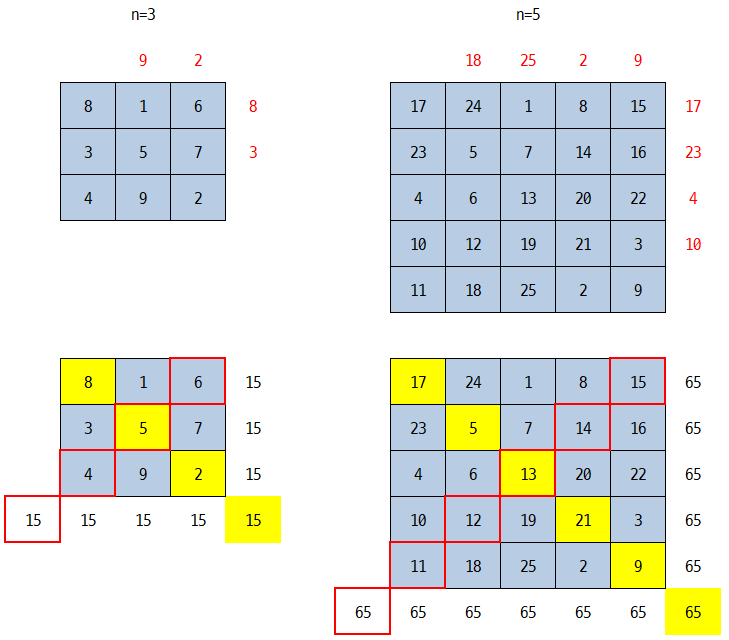

In [3]:
from IPython.display import Image
Image('./magicSquare.png', width='700')

In [19]:
# 1차원 리스트 만들기
a = [0 for i in range(5)] # 0이 5번 반복되는 1차원 리스트
print(a)
# 2차원 리스트 => 리스트이름 = [[0] * 열의개수 for 변수 in range(행의개수)]
b = [[0] * 5 for i in range(5)]
print(b)
# !pip install numpy
import numpy as np
c = np.array(b)
print(c)

[0, 0, 0, 0, 0]
[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


In [21]:
for i in range(5): # 행
    for j in range(5): # 열
        print('{0:2d} '.format(b[i][j]), end='')
    print()

 0  0  0  0  0 
 0  0  0  0  0 
 0  0  0  0  0 
 0  0  0  0  0 
 0  0  0  0  0 


In [23]:
# 5행 5열인 2차원 리스트를 선언한다.
a = [[0] * 5 for i in range(5)]
# 5행 5열일 경우 최초의 '1'이 채워질 위치를 정한다.
i = 0 # 행
j = 2 # 열

for k in range(1, 26):
    a[i][j] = k
    # 마방진에 채운 숫자가 5의 배수이가 판단한다.
    if k % 5 == 0:
        # 5의 배수면 다음에 채워질 숫자의 위치는 행만 1증가시킨다.
        i += 1
    else:
        # 5의 배수가 아니면 다음에 채워질 숫자의 위치는 행인 1감소, 열은 1증가시킨다.
        i -= 1
        # 행이 감소하다가 0보다 작아지면 마지막 행으로 행의 위치를 조정한다.
        if i < 0:
            i = 4
        j += 1
        # 열이 증가하다 5가되면 첫 번째 열로 열의 위치를 조정한다.
        if j >= 5:
            j = 0
# ===== for k in range(1, 26)

for i in range(5): # 행
    for j in range(5): # 열
        print('{0:2d} '.format(a[i][j]), end='')
    print()

17 24  1  8 15 
23  5  7 14 16 
 4  6 13 20 22 
10 12 19 21  3 
11 18 25  2  9 


In [32]:
# 작성할 마방진의 차수를 3이상인 홀수로 받는다.
while True:
    n = int(input('3이상인 홀수를 입력하세요: '))
    if n >= 3 and n % 2 == 1:
        break
    print('콱~~~~~~~~')

# n행 n열인 2차원 리스트를 만든다.
a = [[0] * n for i in range(n)]
i = 0
# 행렬의 차수에 따라 최초의 '1'이 채워질 열을 계산한다.
j = n // 2

for k in range(1, n ** 2 + 1):
    a[i][j] = k
    if k % n == 0:
        i += 1
    else:
        i -= 1
        if i < 0:
            i = n - 1
        j += 1
        if j >= n:
            j = 0

for i in range(n):
    for j in range(n):
        print('{0:3d} '.format(a[i][j]), end='')
    print()

3이상인 홀수를 입력하세요: 31
498 531 564 597 630 663 696 729 762 795 828 861 894 927 960   1  34  67 100 133 166 199 232 265 298 331 364 397 430 463 496 
530 563 596 629 662 695 728 761 794 827 860 893 926 959  31  33  66  99 132 165 198 231 264 297 330 363 396 429 462 495 497 
562 595 628 661 694 727 760 793 826 859 892 925 958  30  32  65  98 131 164 197 230 263 296 329 362 395 428 461 494 527 529 
594 627 660 693 726 759 792 825 858 891 924 957  29  62  64  97 130 163 196 229 262 295 328 361 394 427 460 493 526 528 561 
626 659 692 725 758 791 824 857 890 923 956  28  61  63  96 129 162 195 228 261 294 327 360 393 426 459 492 525 558 560 593 
658 691 724 757 790 823 856 889 922 955  27  60  93  95 128 161 194 227 260 293 326 359 392 425 458 491 524 557 559 592 625 
690 723 756 789 822 855 888 921 954  26  59  92  94 127 160 193 226 259 292 325 358 391 424 457 490 523 556 589 591 624 657 
722 755 788 821 854 887 920 953  25  58  91 124 126 159 192 225 258 291 324 357 390 423 456 489 522 555 58